<a href="https://colab.research.google.com/github/carlosfab/sigmoidal_ai/blob/master/Como_Criar_uma_WordCloud_em_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Como criar uma Wordcloud em Python



> Este *notebook* faz parte [deste artigo](http://sigmoidal.ai/como-criar-uma-wordcloud-em-python/) do *blog* Sigmoidal.



Veja como criar uma wordcloud usando Python com a ajuda da biblioteca `wordcloud`. Wordcloud (em português, nuvem de palavras ou nuvem de tags) é um tipo de visualização de dados muito poderoso, principalmente quando estamos trabalhando com textos, documentos, pesquisas, entre outras.

Resumidamente, é como se você estivesse contando a frequência com que cada palavra aparece em um texto. Com essa frequência, você define tamanhos proporcionais às palavras, dispondo elas também em ângulos diferentes.

As palavras maiores são as que apareceram mais no texto, e as menores são as que menos apareceram. Além de ser extremamente útil para análises, é visualmente impactante, agregando valor a qualquer relatório ou *notebook*.

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/cristo_white-2.png" width="300px"></p>

Na figura acima, eu usei a base de dados disponibilizada pelo Airbnb no seu portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), e peguei os dados para a cidade do Rio de Janeiro. Lá é possível baixar um grande volume de dados de diferentes cidades para desenvolver projetos e soluções de *Data Science*.

Basicamente, eu extrai as descrições de todas as casas que estão para alugar, com a finalidade de descobrir quais os termos e palavras mais usados pelos anfitriões do site. Veja como fazer o mesmo neste tutorial.

Se você quiser acompanhar todo o código em Python, basta clicar no botão abaixo para abrir o Jupyter *notebook* no meu Github



## Importando os dados do Airbnb

Como eu disse, o Airbnb disponibiliza os dados de várias cidades para download. O *dataset* que eu escolhi foi o da figura abaixo. Para te ajudar, eu já fiz o download do *dataset* completo e descompactei o mesmo. Aqui esta o [link para download](http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0).

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/dados_airbnb.png" height="300px"></center>

Este *dataset* tem mais de 110Mb po causa das suas 35.451 entradas e 106 atributos! Vamos importar ele todo, mas como só iremsó vou usar a coluna `summary`, que contém a "propaganda" do dono da casa. Para começar, instale a biblioteca `wordcloud` caso você não tenha, e siga os passos abaixo.



In [0]:
# instalar wordcloud caso você não tenha
!pip install wordcloud -q

In [0]:
# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("http://dl.dropboxusercontent.com/s/fdzigk974zbx2de/listings.csv?dl=0")

# eliminar as colunas com valores ausentes
summary = df.dropna(subset=['summary'], axis=0)['summary']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[100])
display(summary.iloc[120])
display(summary.iloc[133])

'Ambiente tranquilo e familiar,ótimo para viajantes que no final do dia queiram descansar e ter uma noite tranquila. Excelente bairro que fica próximo a Lagoa Rodrigo de Freitas, que é um dos lindos cartões postais de nossa cidade. Aguardo você!'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

Para conseguir criar uma nuvem de palavras eu preciso juntar todas elas em um único texto.

Para você ter ideia, temos um total de 9.823.645 extraídas da base de dados do Airbnb! Essa massa de volumes pode ser difícil de analisar por manipulação tradicional de dados, mas com a ajuda da wordcloud é possível identificar somente o que de fato importa.

In [0]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


Agora sim, vamos para a biblioteca `wordcloud`. A primeira etapa consiste em criar uma lista de **stopwords**. Stopwords são basicamente  palavras que devem ser removidas da wordcloud por não agregarem nenhuma informação (no entanto aparecem muito!). Alguns exemplos são *"a", "não", "mas", "and", "I", "not"*, entre outras.

Depois de definir as palavras que serão descartadas, instanciamos um objeto do tipo `WordCloud` e fornecemos os parâmetros como segue abaixo. Agora é só chamar o método `generate()` e a wordcloud será gerada.

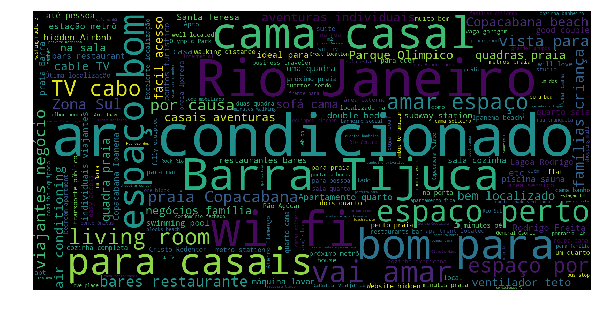

In [0]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

Eu que odeio o calor tenho que concordar com essa nuvem de palavras: ar condicionado é a coisa mais importante para quem aluga uma casa no Rio de Janeiro :)

## Criar uma WordCloud sobre uma imagem

Apenas essa nuvem já seria suficiente para uma análise. No entanto, se você quiser gerar um efeito visual a mais, saiba que é possível usar imagens como máscara nas wordclouds.

Uma vez que eu estou falando de Rio de Janeiro, que tal plotar as palavras sobre uma imagem do Cristo Redentor, símbolo da cidade?!

<p align=center><img src="http://sigmoidal.ai/wp-content/uploads/2019/10/24585310_l-2.jpg" width="200px"></p>

O `wordcloud` analisa as intensidades dos *pixels* e considera o que está em preto como área para desenhar as palavras. Vou importar a figura acima e vamos ver o resultado na prática!



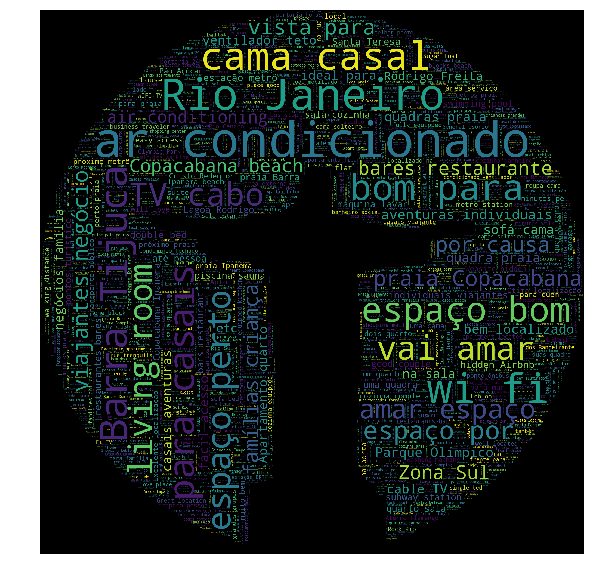

In [0]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/cristo.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

Simples assim. Apenas se certifique que sua imagem realmente apresenta valores em branco e preto para a máscara funcionar.

É possível escolher fonte, tamanho da fonte, quantidade máxima de palavras e cor do fundo.

Espero que tenha gostado deste tutorial. Tenho certeza que na primeira vez que olharem algo do tipo nos seus relatórios você vai escutar algo como "nossa, como você fez isso?!" :)

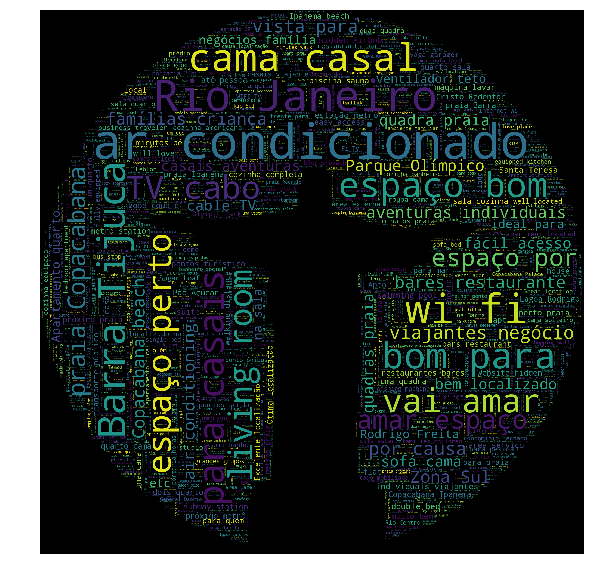

In [0]:
# endereço LOCAL da SUA imagem
rio_mask = np.array(Image.open("/content/cristo.jpg"))
   
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")